In [1]:
import librosa
audio_file_path=r'C:\Mtech1styr\Speeker Recognition(dataset)\UrbanSound8K\audio\fold1\7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]


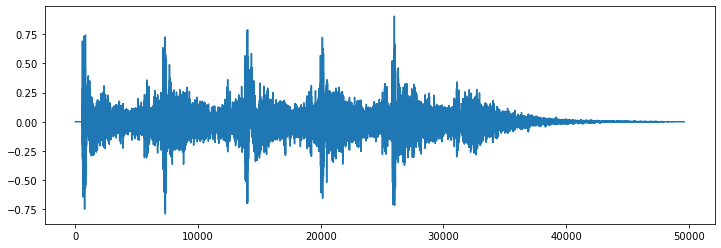

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [5]:
mfccs

array([[-236.01546   , -223.33238   , -230.81067   , ..., -232.38414   ,
        -229.38951   , -224.5962    ],
       [ 150.09904   ,  164.82231   ,  176.60326   , ...,  196.70139   ,
         190.409     ,  162.91656   ],
       [   4.2535515 ,  -11.223283  ,  -28.130497  , ...,  -24.908518  ,
         -23.637192  ,   -4.0557647 ],
       ...,
       [  -0.43494892,   -1.9926164 ,   -6.212633  , ...,   -4.0844183 ,
          -2.935854  ,   -5.927884  ],
       [  -1.6773992 ,    2.6210585 ,    7.741791  , ...,   -9.845162  ,
          -9.999222  ,   -5.2083163 ],
       [   2.4558196 ,    1.8101326 ,   -0.4259416 , ...,   -2.7711093 ,
          -5.384906  ,   -2.728547  ]], dtype=float32)

In [6]:
### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'C:\Mtech1styr\Speeker Recognition(dataset)\UrbanSound8K\audio'
metadata=pd.read_csv(r'C:\Mtech1styr\Speeker Recognition(dataset)\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [8]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [05:09, 10.97it/s]C:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [12:41, 11.84it/s]C:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [13:30, 10.77it/s]


In [9]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [10]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [11]:
X.shape

(8732, 40)

In [12]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [13]:
## Label Encoding
y=np.array(pd.get_dummies(y))

In [14]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912868e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008629e+00, -1.5975088e+00],
       [-4.9827820e+01,  1.8449357e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159238e-01,  2.7930877e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411344e-01,  6.6066748e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839475e+00, -1.9667517e+00, -8.8792086e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413876e+00]], dtype=float32)

In [17]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
X_train.shape

(6985, 40)

In [19]:
X_test.shape

(1747, 40)

In [20]:
y_train.shape

(6985, 10)

In [21]:
y_test.shape

(1747, 10)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [23]:
### No of classes
num_labels=y.shape[1]

In [24]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [27]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
205/219 [===========================>..] - ETA: 0s - loss: 10.3777 - accuracy: 0.1212
Epoch 00001: val_loss improved from inf to 2.27553, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 4ms/step - loss: 9.9147 - accuracy: 0.1201 - val_loss: 2.2755 - val_accuracy: 0.1351
Epoch 2/100
204/219 [==========================>...] - ETA: 0s - loss: 2.5225 - accuracy: 0.1408
Epoch 00002: val_loss improved from 2.27553 to 2.26878, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 7ms/step - loss: 2.5139 - accuracy: 0.1409 - val_loss: 2.2688 - val_accuracy: 0.1276
Epoch 3/100
216/219 [============================>.] - ETA: 0s - loss: 2.3097 - accuracy: 0.1519
Epoch 00003: val_loss improved from 2.26878 to 2.20183, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3097 - accuracy: 0.1518 - val_loss: 2.2018 - val_acc

219/219 [==============================] - 1s 4ms/step - loss: 1.4872 - accuracy: 0.4699 - val_loss: 1.2863 - val_accuracy: 0.5713
Epoch 26/100
214/219 [============================>.] - ETA: 0s - loss: 1.4452 - accuracy: 0.4880
Epoch 00026: val_loss improved from 1.28629 to 1.26808, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.4469 - accuracy: 0.4880 - val_loss: 1.2681 - val_accuracy: 0.5850
Epoch 27/100
202/219 [==========================>...] - ETA: 0s - loss: 1.4260 - accuracy: 0.4969
Epoch 00027: val_loss improved from 1.26808 to 1.22917, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4252 - accuracy: 0.4976 - val_loss: 1.2292 - val_accuracy: 0.6113
Epoch 28/100
201/219 [==========================>...] - ETA: 0s - loss: 1.3999 - accuracy: 0.5026
Epoch 00028: val_loss did not improve from 1.22917
219/219 [==============================]

Epoch 00078: val_loss did not improve from 0.82869
219/219 [==============================] - 1s 3ms/step - loss: 1.0148 - accuracy: 0.6567 - val_loss: 0.8591 - val_accuracy: 0.7338
Epoch 79/100
203/219 [==========================>...] - ETA: 0s - loss: 1.0018 - accuracy: 0.6669
Epoch 00079: val_loss did not improve from 0.82869
219/219 [==============================] - 1s 2ms/step - loss: 1.0033 - accuracy: 0.6667 - val_loss: 0.8608 - val_accuracy: 0.7275
Epoch 80/100
201/219 [==========================>...] - ETA: 0s - loss: 1.0032 - accuracy: 0.6639
Epoch 00080: val_loss improved from 0.82869 to 0.81622, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0013 - accuracy: 0.6628 - val_loss: 0.8162 - val_accuracy: 0.7401
Epoch 81/100
216/219 [============================>.] - ETA: 0s - loss: 1.0011 - accuracy: 0.6630
Epoch 00081: val_loss did not improve from 0.81622
219/219 [==============================] - 1s 3ms

In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7515740990638733
